In [1]:
import numpy as np
import pandas as pd
import fileinput
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix

In [2]:
from scipy import sparse

# Initial exploration

In [2]:
sample = np.genfromtxt("ALL_1000G_phase1interim_jun2011.sample", skip_header=1, dtype='str')
#sample = pd.read_table("ALL_1000G_phase1interim_jun2011.sample", delim_whitespace=True)

In [3]:
len(sample)

1094

In [4]:
legend = np.genfromtxt("ALL_1000G_phase1interim_jun2011_chr20_impute.legend", skip_header=1, dtype='str')
#legend = pd.read_table("ALL_1000G_phase1interim_jun2011_chr20_impute.legend", delim_whitespace=True)

In [5]:
len(legend)

824876

In [6]:
legend

array([['20-60479', '60479', 'C', 'T'],
       ['20-60571', '60571', 'C', 'A'],
       ['20-60795', '60795', 'G', 'C'],
       ..., 
       ['20-62896394', '62896394', 'C', 'G'],
       ['20-62896513', '62896513', 'A', 'G'],
       ['20-62896665', '62896665', 'G', 'A']], 
      dtype='|S11')

In [7]:
len(legend[0])

4

In [8]:
#hap = pd.read_table("ALL_1000G_phase1interim_jun2011_chr20_impute.hap", delim_whitespace=True)
#hap = np.genfromtxt("ALL_1000G_phase1interim_jun2011_chr20_impute.hap", dtype='int')

In [9]:
small = np.genfromtxt("small.hap", dtype='int')

In [10]:
len(small)

5

In [11]:
len(small[0])

2188

In [12]:
len(small[1])

2188

1. shape of hap matrix
2. relationship b/w hap matrix and legend
3. storage mechanisms: more related to choosing a good filetype or storing as sparse matrix?
4. restrictions on using pre-built packages?

In [13]:
np.sum(small[0])

4

In [14]:
np.sum(small[4])

596

In [15]:
np.sum(small[1])

4

In [16]:
np.sum(small[2])

1

In [17]:
np.array_equal(small[0],small[1])

False

In [58]:
'''
def read_files(filename):
    output = []
    for block in fileinput.input(filename):
        block = map(int, block.split(' '))
        block = np.array(block).astype('int')
        output.append(np.nonzero(block))
    fileinput.close()
    np.save('%s.npy' %'filename',  np.array(output))
'''

In [60]:
#read_files("small.hap")

# List of lists format (attempt 1)

In [43]:
small = []
for block in fileinput.input("small.hap"):
    block = map(int, block.split(' '))
    small.append(block)
fileinput.close()

In [44]:
small = csr_matrix(small)

In [45]:
import cPickle
f = open('spmatrix.pkl','wb')
cPickle.dump(small,f,-1)
f.close()

In [46]:
with open('test_sparse_array.dat', 'wb') as outfile:
    cPickle.dump(small, outfile, cPickle.HIGHEST_PROTOCOL)

In [42]:
np.save('small2.npy', small)

In [66]:
subaa = []
for block in fileinput.input("ALL_1000G_phase1interim_jun2011_chr20_Subaa.txt"):
    block = map(int, block.split(' '))
    block = np.array(block).astype('int')
    subaa.append(np.nonzero(block))
fileinput.close()

In [67]:
np.save('subaa.npy', np.array(subaa))

In [71]:
%%time
full = []
for block in fileinput.input("ALL_1000G_phase1interim_jun2011_chr20_impute.hap"):
    block = map(int, block.split(' '))
    block = np.array(block).astype('int')
    full.append(np.nonzero(block))
fileinput.close()

CPU times: user 18min 38s, sys: 7.07 s, total: 18min 45s
Wall time: 18min 54s


In [72]:
np.save('condensed_impute_hap.npy', np.array(full))

In [66]:
fileinput.close()

# CSR Matrix (attempt 2)

In [2]:
data = np.loadtxt('small.hap', delimiter=' ', dtype=int)

In [4]:
data = csr_matrix(data)

In [5]:
data

<5x2188 sparse matrix of type '<type 'numpy.int64'>'
	with 608 stored elements in Compressed Sparse Row format>

In [ ]:
#don't run this, kills kernel
#full = np.loadtxt('ALL_1000G_phase1interim_jun2011_chr20_impute.hap', delimiter=' ', dtype=int)

In [6]:
%%time
full = []
for line in fileinput.input("small.hap"):
    line = sparse.coo_matrix(np.loadtxt([line], delimiter=' ', dtype=int))
    full.append([line])
fileinput.close()

CPU times: user 15.6 ms, sys: 2.71 ms, total: 18.4 ms
Wall time: 15.9 ms


In [7]:
full

[[<1x2188 sparse matrix of type '<type 'numpy.int64'>'
  	with 4 stored elements in COOrdinate format>],
 [<1x2188 sparse matrix of type '<type 'numpy.int64'>'
  	with 4 stored elements in COOrdinate format>],
 [<1x2188 sparse matrix of type '<type 'numpy.int64'>'
  	with 1 stored elements in COOrdinate format>],
 [<1x2188 sparse matrix of type '<type 'numpy.int64'>'
  	with 3 stored elements in COOrdinate format>],
 [<1x2188 sparse matrix of type '<type 'numpy.int64'>'
  	with 596 stored elements in COOrdinate format>]]

In [8]:
B = sparse.bmat(full)

In [9]:
B

<5x2188 sparse matrix of type '<type 'numpy.int64'>'
	with 608 stored elements in COOrdinate format>

In [10]:
%%time
full = []
for line in fileinput.input("ALL_1000G_phase1interim_jun2011_chr20_impute.hap"):
    line = sparse.coo_matrix(np.loadtxt([line], delimiter=' ', dtype=int))
    full.append([line])
fileinput.close()

CPU times: user 27min 55s, sys: 9.4 s, total: 28min 5s
Wall time: 28min 8s


In [11]:
full_sparse = sparse.bmat(full)

In [12]:
np.save("sparse_mat", full_sparse)

In [13]:
full_sparse

<824876x2188 sparse matrix of type '<type 'numpy.int64'>'
	with 119391961 stored elements in COOrdinate format>

# CSC Matrix (attempt 3)

In [3]:
full_coo = np.load("sparse_mat.npy")

In [4]:
full_coo = full_coo.reshape(1)[0]

In [5]:
full_coo

<824876x2188 sparse matrix of type '<type 'numpy.int64'>'
	with 119391961 stored elements in COOrdinate format>

In [10]:
#full_coo = full_coo.todense()

In [11]:
#full_coo.shape

(824876, 2188)

In [6]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
%matplotlib inline

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbg='black')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

In [7]:
import numpy as np
from scipy.sparse import coo_matrix

ax = plot_coo_matrix(full_coo)
ax.figure.show()

/Users/Luke/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


# totally random tree

In [3]:
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB

In [4]:
X = np.load("sparse_mat.npy")

In [5]:
X = X.reshape(1)[0]

In [6]:
X = X.tocsr()

In [28]:
X.shape

(824876, 2188)

In [21]:
%%time
# use RandomTreesEmbedding to transform data
#hasher = RandomTreesEmbedding(n_estimators=10, random_state=0, max_depth=3)
#X_transformed = hasher.fit_transform(X)

# Visualize result using PCA
pca = TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X)

CPU times: user 21.6 s, sys: 6.88 s, total: 28.5 s
Wall time: 33.2 s


In [25]:
pca.explained_variance_ratio_

array([ 0.45614568,  0.02500242])

In [26]:
pca.explained_variance_

array([ 61.61741522,   3.37739636])

In [20]:
X_transformed

<824876x80 sparse matrix of type '<type 'numpy.float64'>'
	with 8248760 stored elements in Compressed Sparse Row format>

In [16]:
X_reduced

array([[ 3.1611466 , -0.04073204],
       [ 3.1611466 , -0.04073204],
       [ 3.1611466 , -0.04073204],
       ..., 
       [ 3.1611466 , -0.04073204],
       [ 3.1611466 , -0.04073204],
       [ 1.91075707,  0.24940359]])

In [23]:
X_reduced

array([[ 0.08584731,  0.11856492],
       [ 0.08562726,  0.1512888 ],
       [ 0.02127306, -0.0082441 ],
       ..., 
       [ 0.02220266, -0.01827146],
       [ 0.10769837,  0.1989282 ],
       [ 5.35712828,  0.55856766]])

In [27]:
X_reduced.shape

(824876, 2)

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

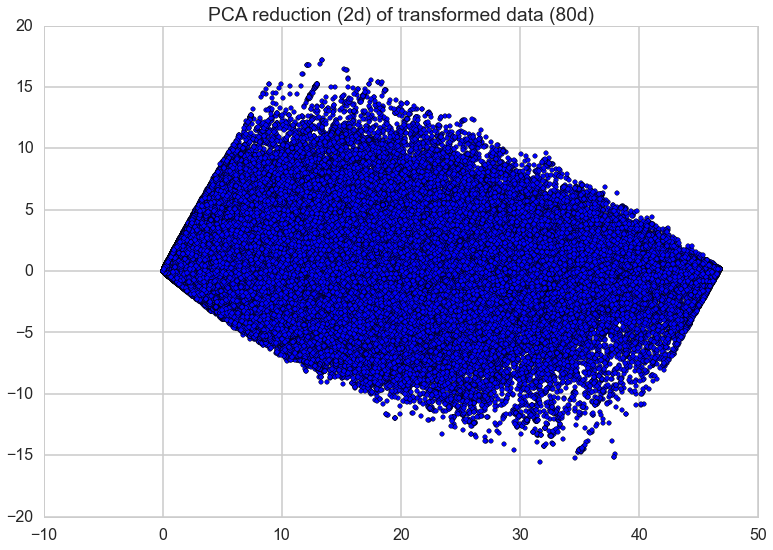

In [24]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=50)
plt.set_title("PCA reduction (2d) of transformed data (%dd)" %
              X_transformed.shape[1])
plt.set_xticks(())
plt.set_yticks(())
plt.show()

In [29]:
from sklearn.cluster import KMeans

In [30]:
%%time
K = 3
KM = KMeans(n_clusters=K, init='k-means++')
KM.fit(X_reduced)

CPU times: user 9.34 s, sys: 2.05 s, total: 11.4 s
Wall time: 10.2 s


In [31]:
KM.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [32]:
set(KM.labels_)

{0, 1, 2}

In [33]:
KM.labels_.shape

(824876,)

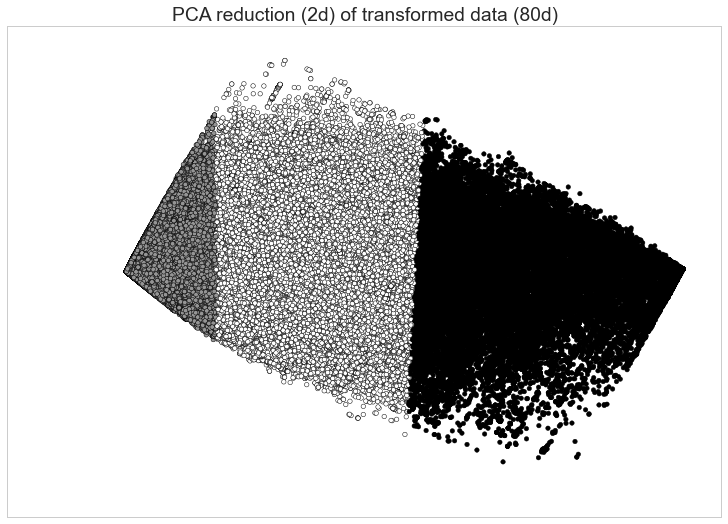

In [35]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=KM.labels_)
plt.title("PCA reduction (2d) of transformed data (%dd)" % X_transformed.shape[1])
plt.xticks(())
plt.yticks(())
plt.show()